In [39]:
import pandas as pd
import numpy as np
from geopy import distance

df = pd.read_csv('../data/processed/3440568461.csv', header=None, names=('time', 'distance', 'lat', 'lon', 'elev', 'power', 'cadence', 'heart_rate'))
SECONDS_PER_HOUR = 3600
df = df.sort_values(by='time')
df['time_dt'] = pd.to_datetime(df['time'])
df['lat_lon'] = list(zip(df['lat'], df['lon']))
df['prev_lat_lon'] = df['lat_lon'].shift(1).fillna(df['lat_lon'])
df['prev_time_dt'] = df['time_dt'].shift(1)
df['elapsed'] = (df['time_dt']-df['prev_time_dt']).dt.total_seconds().fillna(0)
df['distance_calculated'] = df.apply(lambda x: distance.distance(x['lat_lon'],x['prev_lat_lon']).miles,axis=1)
df['distance'] = df['distance'].fillna(df['distance_calculated'])
df['distance_5r'] = df['distance'].rolling(5).sum()
df['elapsed_5r'] = df['elapsed'].rolling(5).sum()
df['speed'] = (df['distance_5r']/df['elapsed_5r']).fillna(0)*SECONDS_PER_HOUR

In [45]:
df

,time,distance,lat,lon,elev,power,cadence,heart_rate,time_dt,lat_lon,prev_lat_lon,prev_time_dt,elapsed,distance_calculated,distance_5r,elapsed_5r,speed
0,2020-03-25 21:00:22,0.000000,-11.635825,166.953431,16.40420,160,0,144,2020-03-25 21:00:22,"(-11.635824756201874, 166.95343090147784)","(-11.635824756201874, 166.95343090147784)",NaT,0.0,0.000000,NaN,NaN,0.000000
1,2020-03-25 21:00:23,0.006083,-11.635886,166.953367,16.40420,286,0,145,2020-03-25 21:00:23,"(-11.635886447007724, 166.95336652846305)","(-11.635824756201874, 166.95343090147784)",2020-03-25 21:00:22,1.0,0.006083,NaN,NaN,0.000000
2,2020-03-25 21:00:24,0.005178,-11.635940,166.953313,16.40420,340,0,145,2020-03-25 21:00:24,"(-11.635940091186722, 166.95331288428406)","(-11.635886447007724, 166.95336652846305)",2020-03-25 21:00:23,1.0,0.005178,NaN,NaN,0.000000
3,2020-03-25 21:00:25,0.006742,-11.635990,166.953227,16.40420,227,0,145,2020-03-25 21:00:25,"(-11.635989712052297, 166.95322705359766)","(-11.635940091186722, 166.95331288428406)",2020-03-25 21:00:24,1.0,0.006742,NaN,NaN,0.000000
4,2020-03-25 21:00:26,0.006394,-11.636046,166.953152,16.40420,326,0,145,2020-03-25 21:00:26,"(-11.636046038440243, 166.95315195174706)","(-11.635989712052297, 166.95322705359766)",2020-03-25 21:00:25,1.0,0.006394,0.024397,4.0,21.957465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,2020-03-25 22:04:00,0.000645,-11.642849,166.938368,429.79004,0,0,173,2020-03-25 22:04:00,"(-11.64284946144178, 166.93836761601497)","(-11.642840073710454, 166.93836761601497)",2020-03-25 22:03:59,1.0,0.000645,0.009247,5.0,6.657731
3819,2020-03-25 22:04:01,0.000815,-11.642855,166.938357,429.79004,0,0,171,2020-03-25 22:04:01,"(-11.64285482585968, 166.93835688717917)","(-11.64284946144178, 166.93836761601497)",2020-03-25 22:04:00,1.0,0.000815,0.007322,5.0,5.271591
3820,2020-03-25 22:04:02,0.000092,-11.642856,166.938357,429.79004,0,0,170,2020-03-25 22:04:02,"(-11.642856166964156, 166.93835688717917)","(-11.64285482585968, 166.93835688717917)",2020-03-25 22:04:01,1.0,0.000092,0.004781,5.0,3.442368
3821,2020-03-25 22:04:03,0.000184,-11.642853,166.938357,429.79004,0,0,169,2020-03-25 22:04:03,"(-11.642853484755204, 166.93835688717917)","(-11.642856166964156, 166.93835688717917)",2020-03-25 22:04:02,1.0,0.000184,0.003564,5.0,2.565944


In [37]:
df['time_dt']

0      2020-03-25 21:00:22
1      2020-03-25 21:00:23
2      2020-03-25 21:00:24
3      2020-03-25 21:00:25
4      2020-03-25 21:00:26
               ...        
3818   2020-03-25 22:04:00
3819   2020-03-25 22:04:01
3820   2020-03-25 22:04:02
3821   2020-03-25 22:04:03
3822   2020-03-25 22:04:04
Name: time_dt, Length: 3823, dtype: datetime64[ns]

In [48]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import streamlit as st
import pandas as pd
from geopy import distance
import numpy as np

def calculate_speed(df):
    #Calculates 5 second average speed
    SECONDS_PER_HOUR = 3600
    df = df.sort_values(by='time')
    df['time_dt'] = pd.to_datetime(df['time'])
    df['lat_lon'] = list(zip(df['lat'], df['lon']))
    df['prev_lat_lon'] = df['lat_lon'].shift(1).fillna(df['lat_lon'])
    df['prev_time_dt'] = df['time_dt'].shift(1)

    if not np.isnan(df['distance'].max()):
        df['prev_distance'] = df['distance'].shift(1)
        #Only want distance difference between this row and prior row
        df['distance'] = df['distance']-df['prev_distance']
        df['distance'] = df['distance'].fillna(0)
        units = 'meters'
    else:
        units = 'miles'
    
    df['elapsed'] = (df['time_dt'] - df['prev_time_dt']).dt.total_seconds().fillna(0)
    df['elapsed_total'] = (df['time_dt'] - df['time_dt'].min()).dt.total_seconds().fillna(0)
    df['distance_calculated'] = df.apply(lambda x: distance.distance(x['lat_lon'], x['prev_lat_lon']).miles, axis=1)
    df['distance'] = df['distance'].fillna(df['distance_calculated'])
    df['distance_5r'] = df['distance'].rolling(5).sum()
    df['elapsed_5r'] = df['elapsed'].rolling(5).sum()
    df['speed'] = (df['distance_5r'] / df['elapsed_5r']).fillna(0) * SECONDS_PER_HOUR
    
    if units == 'meters':
        METERS_TO_MILES_FACTOR = 1609
        df['speed'] = df['speed']/METERS_TO_MILES_FACTOR
    return df

def get_speed_time_plot(df):
    if 'speed' not in df.columns:
        df = calculate_speed(df)

    fig, ax = plt.subplots(1,1,figsize=(14,8))
    lp = sns.lineplot(x='elapsed_total',y='speed',data=df, ax=ax)
    ax.set_xlim(1,df.shape[0])
    max_speed = df['speed'].max()
    ax.set_ylim(0,max_speed*1.1)
    ax.xaxis.set_major_locator(MultipleLocator(60))  # show every 5th tick
    ax.set(xlabel='Time Elapsed (Seconds)', ylabel='Speed (MPH)')
    
    return fig

In [49]:
df = pd.read_csv('../data/processed/10216028842.csv', header=None, names=('time', 'distance', 'lat', 'lon', 'elev', 'power', 'cadence', 'heart_rate'))

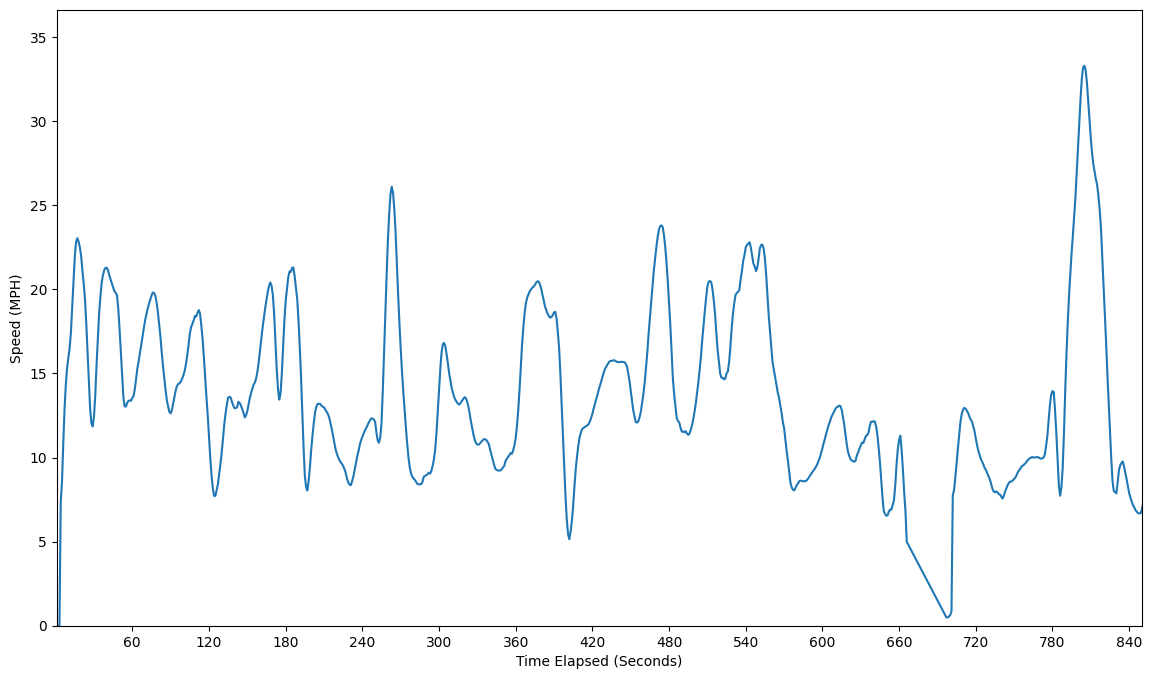

In [50]:
from matplotlib import pyplot as plt

fig = get_speed_time_plot(df)
plt.show(fig)